In [1]:
import os
import torch

c:\Users\rachi\Desktop\inueuron\PERSONAL PROJECTS\Brain MRI Segmentation\Brain-Tumor-Semantic-Segmentation\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

from torch_snippets import *
from torchvision import transforms
#from sklearn.model_selection import train_test_split
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [7]:
import segmentation_models_pytorch as smp

In [4]:
os.chdir("..")

In [5]:
os.chdir("models")

In [6]:
os.listdir()

['fpn_resnext50_32x4d.pth',
 'unet_resnet18.pth',
 'unet_vgg16bn.pth',
 'unet_vgg16bn_augmentation.pth',
 'unet_vgg19bn_augmentation.pth']

In [38]:
ENCODER = 'vgg16_bn'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'sigmoid'
DEVICE = device
CLASSES = ['tumor']
preprocessing_fn  = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

In [11]:
model = torch.load('unet_vgg16bn.pth',map_location=torch.device(device))

In [40]:
def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')

In [12]:
os.chdir("..")

In [240]:
img_path = "test.jpg"

In [241]:
image = read(img_path,1)

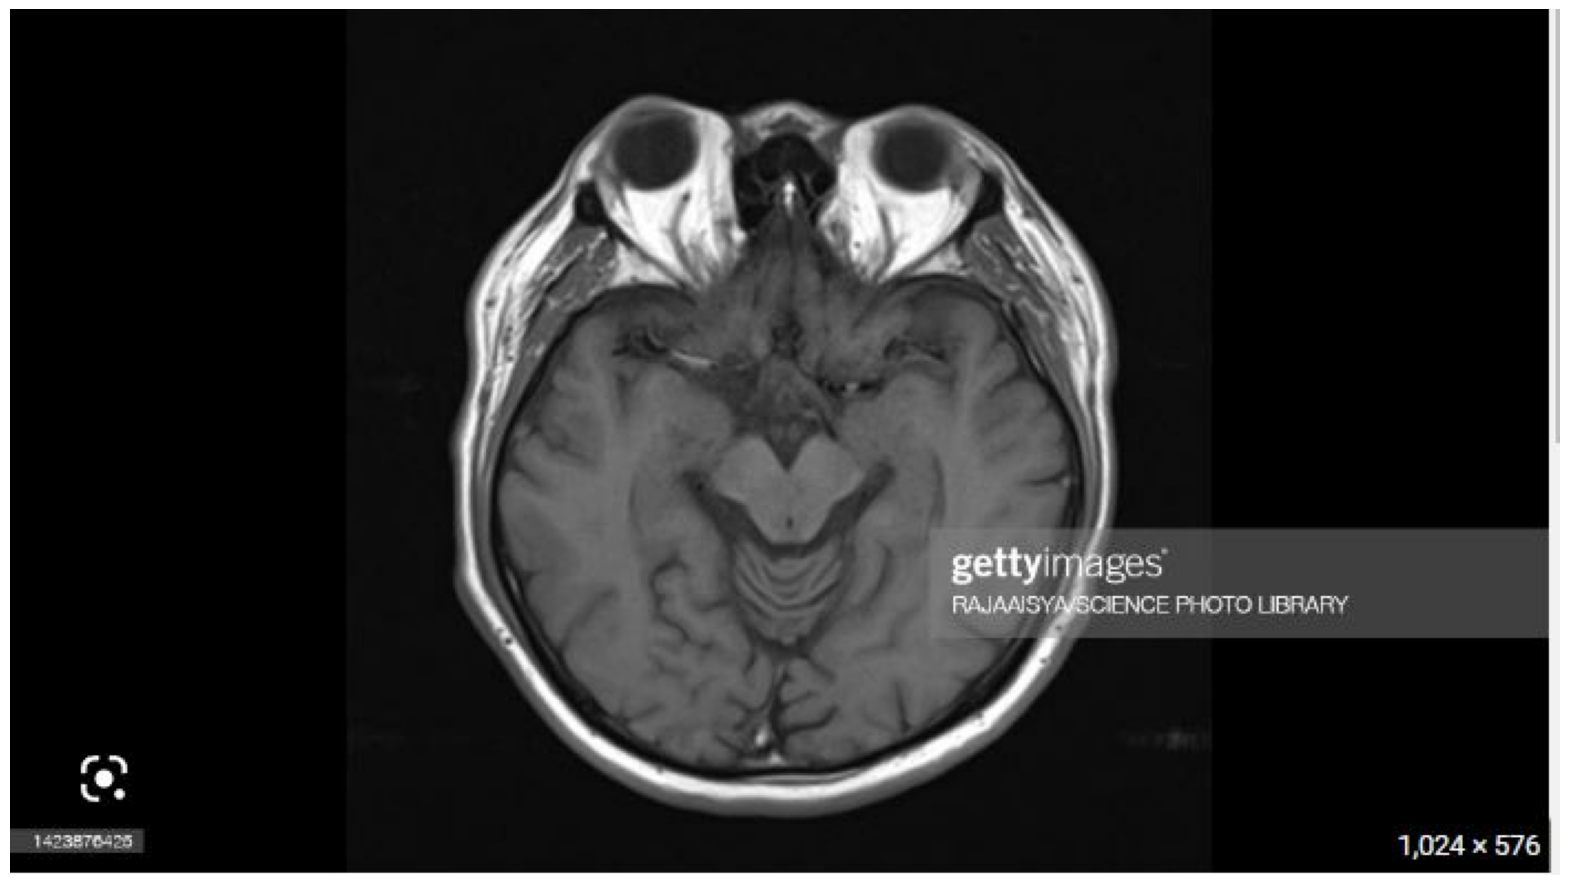

In [242]:
show(image)

In [243]:
prepro_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

In [244]:
img_inference = cv2.resize(image, (224,224))

In [245]:
img = img_inference.copy()

In [246]:
img = img/255.

In [247]:
img = np.array(img)

In [248]:
img = prepro_fn(img)

In [249]:
img = to_tensor(img)

In [250]:
x_tensor = torch.from_numpy(img).to(DEVICE).unsqueeze(0)

In [251]:
pr_mask = model.predict(x_tensor)

In [252]:
pr_mask = (pr_mask.squeeze().cpu().numpy().round())

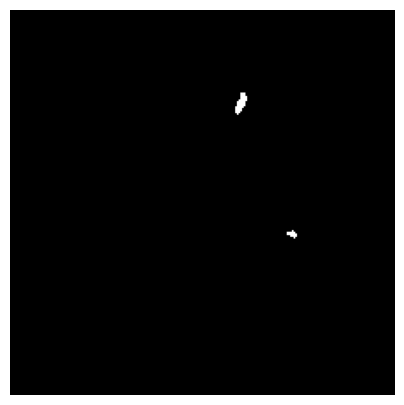

In [253]:
show(pr_mask)

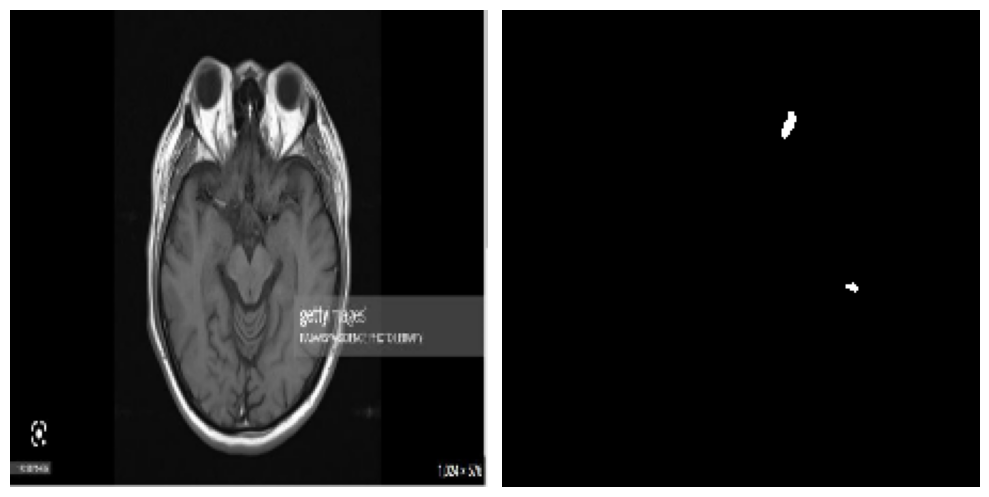

In [254]:
subplots([img_inference, pr_mask],figsize=(10,10))

In [255]:
pr_mask.shape

(224, 224)

In [256]:
msk_stack = np.stack((pr_mask,pr_mask,pr_mask),axis = 2)

In [257]:
overlayed_img = np.where(msk_stack, (255,0,0), img_inference)

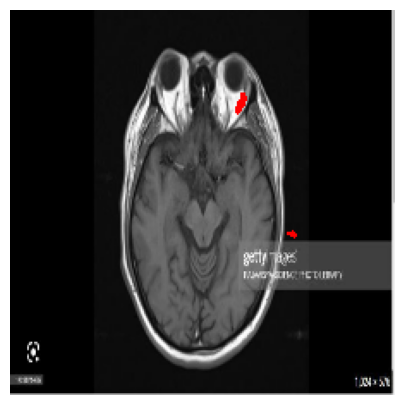

In [258]:
show(overlayed_img)

In [75]:
rgba = cv2.cvtColor(img_inference, cv2.COLOR_RGB2RGBA)


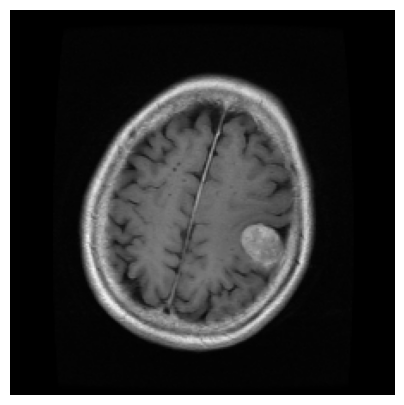

In [76]:
show(rgba)

In [77]:
rgba[:, :, 3] = pr_mask